# The Feelings of the Crisis

When you read a news article, normally the headline is the hook to continue reading. However, a negative title could lead you to skip reading an article if you don't want to be in a bad mood. But is this accurate?

On this activity you are tasked to corroborate if a news title with a negative sentiment leads or not to a negative content. You will use VADER sentiment to accomplish this work using the news articles that you previously download on _The Voice of the Crisis_ activity.

In [1]:
# Initial imports
import os
from path import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

get_ipython().run_line_magic("matplotlib", "inline")


## Instructions

Just for convenience download the `vader_lexicon` in order to initialize the VADER sentiment analyzer

In [2]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/josearturomorasoto/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Load the News Articles from the CSV File as a DataFrame

Pick the CSV file you created on _The Voice of the Crisis_ activity and load it as a DataFrame, remember to specify the `encoding='utf-8-sig'` parameter.

In [3]:
# Load news from CSV file
file_path = Path("Data/crisis_news_en_es.csv")
news_df = pd.read_csv(file_path, encoding="utf-8-sig")
news_df.head()


,date,description,language,text,title
0,2019-07-08,Technology has been used to manage regulatory ...,en,Technology has been used to manage regulatory ...,The startups creating the future of RegTech an...
1,2019-06-15,Who doesn’t love making signs and getting angr...,en,Having never attended my high school prom (I b...,I Don’t Go to Parties. I Go to Protests.
2,2019-07-09,A probability model used by the New York Fed t...,en,David Karp/AP\r\n<ul><li>A probability model u...,A critical recession indicator used by the Fed...
3,2019-06-28,"What is the G20, and what do they do when they...",en,Image copyrightGetty ImagesImage caption\r\n A...,"What is the G20 summit, and what do world lead..."
4,2019-07-07,How entrepreneur Andy Scott was able to rebuil...,en,Image copyrightAndy ScottImage caption\r\n And...,"'I got wiped out, but I was determined to make..."


The VADER sentiment module is only trained to score sentiment on English language, so create a new DataFrame only with news in English. You will learn how to score sentiment in multiple languages later.

In [4]:
# Fetch only English news
news_en_df = news_df[news_df["language"] == "en"]
news_en_df.head()


,date,description,language,text,title
0,2019-07-08,Technology has been used to manage regulatory ...,en,Technology has been used to manage regulatory ...,The startups creating the future of RegTech an...
1,2019-06-15,Who doesn’t love making signs and getting angr...,en,Having never attended my high school prom (I b...,I Don’t Go to Parties. I Go to Protests.
2,2019-07-09,A probability model used by the New York Fed t...,en,David Karp/AP\r\n<ul><li>A probability model u...,A critical recession indicator used by the Fed...
3,2019-06-28,"What is the G20, and what do they do when they...",en,Image copyrightGetty ImagesImage caption\r\n A...,"What is the G20 summit, and what do world lead..."
4,2019-07-07,How entrepreneur Andy Scott was able to rebuil...,en,Image copyrightAndy ScottImage caption\r\n And...,"'I got wiped out, but I was determined to make..."


### Calculating VADER Sentiment Score for News Titles and Text

As you know the `compound` score could be used to get a normalized score for a sentiment, in this section you have to create a function called `get_sentiment(score)` that will return a normalized value of sentiment for the `score` parameter based on the rules you learn. This function should return `1` for positive sentiment, `-1` for negative sentiment, and `0` for neutral sentiment.

In [5]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result



Use the the VADER sentiment module from `NLTK` to score the sentiment of every news article title and text in english; you should append ten new columns to the English news DataFrame to store the results as follows.

* Title's compound score
* Title's positive score
* Title's neutral score
* Title's negative score
* Title's normalized score (using the `get_sentiment()` function)
* Text's compound score
* Text's positive score
* Text's neutral score
* Text's negative score
* Text's normalized score (using the `get_sentiment()` function)

In [6]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in news_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
news_en_df = news_en_df.join(title_sentiment_df).join(text_sentiment_df)

news_en_df.head()


,date,description,language,text,title,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2019-07-08,Technology has been used to manage regulatory ...,en,Technology has been used to manage regulatory ...,The startups creating the future of RegTech an...,0.2960,0.196,0.804,0.000,1,-0.7351,0.00,0.863,0.137,-1.0
1,2019-06-15,Who doesn’t love making signs and getting angr...,en,Having never attended my high school prom (I b...,I Don’t Go to Parties. I Go to Protests.,0.2023,0.281,0.521,0.198,1,0.6542,0.17,0.724,0.106,1.0
2,2019-07-09,A probability model used by the New York Fed t...,en,David Karp/AP\r\n<ul><li>A probability model u...,A critical recession indicator used by the Fed...,-0.8481,0.000,0.586,0.414,-1,-0.4215,0.00,0.938,0.062,-1.0
3,2019-06-28,"What is the G20, and what do they do when they...",en,Image copyrightGetty ImagesImage caption\r\n A...,"What is the G20 summit, and what do world lead...",0.0000,0.000,1.000,0.000,0,0.0000,0.00,1.000,0.000,0.0
4,2019-07-07,How entrepreneur Andy Scott was able to rebuil...,en,Image copyrightAndy ScottImage caption\r\n And...,"'I got wiped out, but I was determined to make...",0.4767,0.237,0.763,0.000,1,0.0000,0.00,1.000,0.000,0.0


### Analyzing Sentiments Results

How the sentiment of the title and the text differs on news articles?

To answer this question, on this section you will create a bar chart contrasting the normalized sentiment for the title and the text of each news article. Use the build-in `plot()` method of the Pandas DataFrame to create a bar chart like the one bellow. Be aware that you chart might differ from this one due to is made from a different news DataFrame.

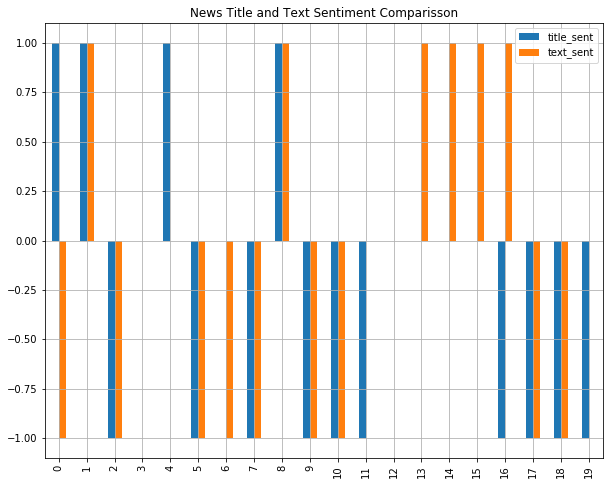

In [7]:
news_en_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)


Finally get the descriptive statistics from the English news DataFrame and discuss the analysis results with your partners.

In [8]:
news_en_df.describe()



,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,-0.217880,0.063800,0.772850,0.163350,-0.300000,-0.063389,0.076158,0.836421,0.087421,-0.157895
std,0.392709,0.100048,0.174684,0.173608,0.801315,0.538478,0.073592,0.108026,0.073031,0.898342
min,-0.848100,0.000000,0.431000,0.000000,-1.000000,-0.891000,0.000000,0.683000,0.000000,-1.000000
25%,-0.615525,0.000000,0.639750,0.000000,-1.000000,-0.461900,0.000000,0.742000,0.023000,-1.000000
50%,-0.025800,0.000000,0.774000,0.184500,-0.500000,0.000000,0.049000,0.840000,0.079000,0.000000
75%,0.006450,0.111500,0.927250,0.293250,0.000000,0.411550,0.129500,0.919000,0.135000,1.000000
max,0.476700,0.281000,1.000000,0.569000,1.000000,0.765000,0.235000,1.000000,0.250000,1.000000
